In [175]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import requests
import os
import alpaca_trade_api as tradeapi
import requests
from MCForecastTools import MCSimulation


%matplotlib inline

# Part 1  - financial planner for emergencies

Average monthly house hold income for each member is $12,000
<br><br>savings portfolio with crpyto , stocks and bonds<br><br>Members hold 1.2 BTC and 5.3 ETH

In [176]:
# number of the coin they hold

my_btc = 1.2
my_etc = 5.3


In [177]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD" + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" + "?format=json"

response_btc = requests.get(btc_url)
response_eth = requests.get(eth_url)

In [178]:
btc_current = response_btc.json()
btc_p = btc_current['data']['1']['quotes']['USD']['price']
print(f'The current price of BTC is ${btc_p}, in CAD')

The current price of BTC is $23132.0, in CAD


In [179]:
eth_current = response_eth.json()
eth_p = eth_current['data']['1027']['quotes']['USD']['price']
print(f'The current price of BTC is ${eth_p}, in CAD')

The current price of BTC is $1638.72, in CAD


In [180]:
val_bit = my_btc * btc_p
val_eth = my_etc * eth_p
total_val = round(val_bit + val_eth, 2)

In [181]:
print(f'Current value in CAD of each crypto are ${val_bit} for bitcoin and ${val_eth} for ethereum. Their total value in the portfolio is ${total_val}!')

Current value in CAD of each crypto are $27758.399999999998 for bitcoin and $8685.216 for ethereum. Their total value in the portfolio is $36443.62!


In [182]:
my_agg = 200 
my_spy = 50

In [183]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [184]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


date = '2020-08-07'

In [185]:
#get current closing prices for tickers
prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = date,
    end = date
).df 

# Re-organise the data

AGG=prices[prices['symbol']=='AGG'].drop('symbol', axis =1) # kinda like an if
SPY =prices[prices['symbol']=='SPY'].drop('symbol', axis =1)


prices1 = pd.concat([AGG,SPY], axis=1, keys=['AGG' , 'SPY'])

prices1.head(5)

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [186]:
bonds = (prices.iloc[0, 3] * my_agg)
stocks = (prices.iloc[1,3] * my_spy)

print(f'Total value of bonds in portfolio is ${bonds} and total value of stocks in portfolio is ${stocks}')

Total value of bonds in portfolio is $23886.0 and total value of stocks in portfolio is $16728.5


In [187]:
monthly_income = 12000

df_savings = pd.DataFrame({'stocks': stocks, 'bonds':bonds, 'crypto':total_val}, index = ['amount'])
df_savings = df_savings.T
df_savings

,amount
stocks,16728.50
bonds,23886.00
crypto,36443.62


<AxesSubplot:ylabel='amount'>

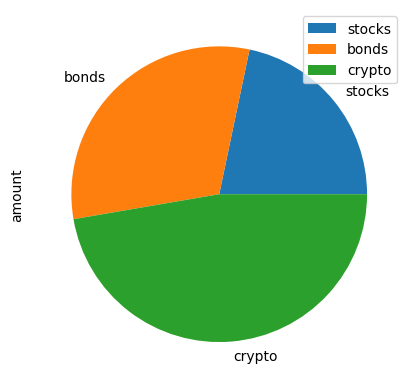

In [188]:
df_savings.plot(kind='pie', y ='amount')

In [189]:
ideal_emergency_income = monthly_income * 3
difference = df_savings.sum() - ideal_emergency_income
insertable = round(difference[0], 2)

In [190]:
if df_savings['amount'].sum() > ideal_emergency_income:
    print(f'Congratulations mate, you have enough money, with ${insertable} left over')
elif df_savings['amount'].sum() == ideal_emergency_income:
    print('Congratulations on reaching the financial goal')
    
else:
    print(f'You are {insertable} away from reaching your financial goal')

Congratulations mate, you have enough money, with $41058.12 left over


# Part 2 - financial planner for retirement

In [191]:
a = pd.Timestamp('2014-08-07', tz = 'America/New_York').isoformat()
b = pd.Timestamp('2020-08-07', tz = 'America/New_York').isoformat()

In [192]:
#get current closing prices for tickers
hist_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = a,
    end = b
).df 

# Re-organise the data

AGG=hist_prices[hist_prices['symbol']=='AGG'].drop('symbol', axis =1) # kinda like an if
SPY =hist_prices[hist_prices['symbol']=='SPY'].drop('symbol', axis =1)


hist_prices1 = pd.concat([AGG,SPY], axis=1, keys=['AGG' , 'SPY'])

hist_prices1.head(5)

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.820  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.685  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.890  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.240  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.400  2143773   

                                                       SPY            \
                          trade_count        vwap     open      high   
timestamp                                                              
2015-12-01 05:00:00+00:00       15562  108.754152  209.440  210.8200   
2015-12-02 05:00:00+00:00       11581  108.684692  210.615  211.0000   
2015-12-03 05:00:00+00:00       16801  108.040315  208.830  209.1500   
2015-12-04 05:00:00+00:00        9796  108.192232  206.080  209.9700   
2015-12-07 05:00:00+00:00        9104  108.460067  209.230  209.7295   

                                                                     \
                                low    close     volume trade_count   
timestamp                                                             
2015-12-01 05:00:00+00:00  209.1100  210.680   97858418      337780   
2015-12-02 05:00:00+00:00  208.2300  208.529  108069059      367013   
2015-12-03 05:00:00+00:00  204.7511  205.610  166224154      546768   
2015-12-04 05:00:00+00:00  205.9300  209.620  192878747      556731   
2015-12-07 05:00:00+00:00  207.2000  208.350  102027111      374705   

                                       
                                 vwap  
timestamp                              
2015-12-01 05:00:00+00:00  209.921410  
2015-12-02 05:00:00+00:00  209.563055  
2015-12-03 05:00:00+00:00  206.878936  
2015-12-04 05:00:00+00:00  208.178631  
2015-12-07 05:00:00+00:00  208.276128

In [237]:
sixtyfourty = pd.DataFrame()

#fill out the df
sixtyfourty['AGG'] = hist_prices1['AGG']['close']
sixtyfourty['SPY'] = hist_prices1['SPY']['close']

#drop time component of the date
sixtyfourty.index = sixtyfourty.index.date

sixtyfourty

,AGG,SPY
2015-12-01,108.820,210.680
2015-12-02,108.685,208.529
2015-12-03,107.890,205.610
2015-12-04,108.240,209.620
2015-12-07,108.400,208.350
...,...,...
2020-08-03,119.400,328.670
2020-08-04,119.630,330.000
2020-08-05,119.400,332.030
2020-08-06,119.570,334.320


#### Monte Carlo

In [238]:
# Set number of simulations
num_sims = 500


#initialize function
sim_60_40 = MCSimulation(
    portfolio_data = hist_prices1,
    weights=[0.4,0.6],
    num_simulation=num_sims,
    num_trading_days=252*30
)

In [239]:
sim_60_40.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/johnbilsel/Desktop/code/Fintech/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995495,1.003549,0.999017,0.999908,0.984985,0.997122,1.002578,0.999432,1.000767,1.002305,...,1.000919,0.992938,1.006348,0.995955,1.004376,0.996360,0.987428,0.993336,0.998405,0.997975
2,0.998516,0.994722,0.986755,0.999231,0.990715,0.980851,0.989582,1.008819,0.991020,1.004431,...,1.009231,0.995739,0.995483,1.004029,0.999033,0.991887,0.988409,0.991023,1.003711,0.999424
3,0.999544,1.001594,0.999886,0.997949,0.994055,0.976142,0.979322,0.996462,1.000045,1.007896,...,1.007718,0.988618,1.002561,0.998122,0.987510,0.983804,0.991295,0.998336,1.004875,0.992472
4,1.009120,1.000756,1.005424,1.004567,0.999878,0.977361,0.972250,0.998924,1.009958,1.018954,...,1.012061,0.995590,1.013143,0.971513,0.994994,0.989224,0.991979,1.004449,0.999668,0.995337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.293237,9.521133,6.297700,9.206612,4.454809,4.506793,22.528461,31.593520,18.924598,14.355496,...,6.111208,36.556074,12.410898,5.826563,7.200367,4.185535,4.072814,5.852959,3.263916,25.919395
7557,4.283033,9.541328,6.354549,9.040465,4.418062,4.525530,22.182960,31.460220,18.892565,14.247366,...,6.223571,36.472109,12.499513,5.803464,7.180710,4.148192,4.041220,5.791521,3.285839,26.433495
7558,4.289600,9.528339,6.323918,9.076259,4.404366,4.496459,22.314936,31.548365,19.064158,13.999471,...,6.209345,36.256289,12.605916,5.871527,7.184265,4.188408,4.069428,5.785166,3.281705,26.160010
7559,4.376437,9.427506,6.393091,9.099485,4.347976,4.474602,22.180510,31.562722,18.995630,13.844813,...,6.163307,36.646631,12.712250,5.888451,7.240107,4.172947,4.076558,5.788216,3.252785,25.883484


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

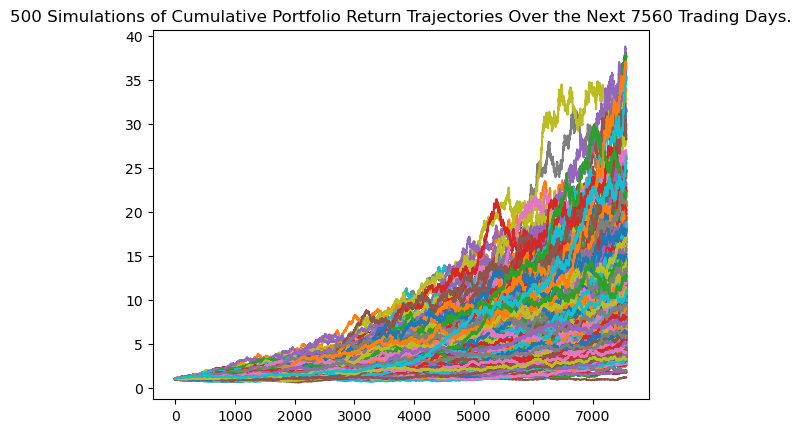

In [240]:
sim_60_40.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

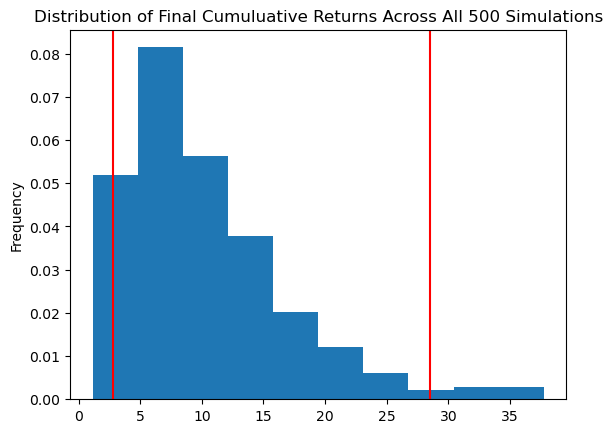

In [241]:
sim_60_40.plot_distribution()

In [242]:
sim_ret = {
    "mean": list(sim_60_40.simulated_return.mean(axis=1)),
    "median": list(sim_60_40.simulated_return.median(axis=1)),
    "min": list(sim_60_40.simulated_return.min(axis=1)),
    "max": list(sim_60_40.simulated_return.max(axis=1))
}

df_sim_ret = pd.DataFrame(sim_ret)

df_sim_ret

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000077,0.999982,0.981397,1.023927
2,1.000253,1.000599,0.973813,1.024075
3,1.000670,1.000696,0.972600,1.029763
4,1.001010,1.000587,0.966475,1.038303
...,...,...,...,...
7556,10.376472,8.654888,1.143344,38.172069
7557,10.386390,8.657219,1.147385,37.957844
7558,10.386348,8.637283,1.146440,37.571784
7559,10.386724,8.680757,1.146058,37.790771


In [245]:
summ = sim_60_40.summarize_cumulative_return()
Low = round(summ['95% CI Lower'], 2) * 20000
Upp = round(summ['95% CI Upper'], 2) * 20000
avg = round(summ['mean'], 2) * 20000

summ

count           500.000000
mean             10.396805
std               6.611979
min               1.157666
25%               5.635896
50%               8.706441
75%              13.232292
max              37.737144
95% CI Lower      2.772465
95% CI Upper     28.500493
Name: 7560, dtype: float64

### Anaylze the Retirement Portfolio Forecasts:



In [246]:
print(f'We fed returns on bonds and stocks into the model to forecast the future potential cumulative returns on a  60 (stocks) / 40 (bonds) portfolio. In the code right above, we see some summary statistics which of the expected value of the portfolio in 30 years. Over 30 years, the $20,000 investment wouldve on average lead to ${avg}. The lower and upper bounds for the E(V) of p with a 95% CI are ${Low} and ${Upp}, respectively')

We fed returns on bonds and stocks into the model to forecast the future potential cumulative returns on a  60 (stocks) / 40 (bonds) portfolio. In the code right above, we see some summary statistics which of the expected value of the portfolio in 30 years. Over 30 years, the $20,000 investment wouldve on average lead to $208000.0. The lower and upper bounds for the E(V) of p with a 95% CI are $55400.0 and $570000.0, respectively


Starting with a 50% increase in the initial Investment:

In [247]:
new_Low = round(summ['95% CI Lower'], 2) * 30000
new_upp = round(summ['95% CI Upper'], 2) * 30000
new_avg = round(summ['mean'], 2) * 30000

In [248]:
print(f'If there was a 50% increased initial investment we would start with $30,000. Therefore the new exp port value (mean) and the lower and upper bounds would be ${new_avg}, ${new_Low} and ${new_upp} respectively')

If there was a 50% increased initial investment we would start with $30,000. Therefore the new exp port value (mean) and the lower and upper bounds would be $312000.0, $83100.0 and $855000.0 respectively


Forecast Cumulative Returns in 10 Years
The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following:

Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset—that is, stock—to help accumulate wealth for retirement.

Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks.

Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In [249]:
#Current: 
section_b = df_savings.drop('crypto', axis=0)
section_b['%'] = section_b['amount']/section_b['amount'].sum()


w_stock = section_b.iloc[0,1]
w_bond = section_b.iloc[1,1]

section_b

,amount,%
stocks,16728.5,0.411885
bonds,23886.0,0.588115


In [230]:
# Set number of simulations
num_sims = 500


#initialize function
sim_modified = MCSimulation(
    portfolio_data = hist_prices1,
    weights=[0.2,0.8],
    num_simulation=num_sims,
    num_trading_days=252*10
)

In [231]:
sim_modified.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/johnbilsel/Desktop/code/Fintech/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995081,1.010939,1.000404,1.000531,1.000239,1.011655,1.006398,0.999612,0.990127,1.011564,...,0.988892,0.996113,0.989715,0.997179,1.012786,1.018668,0.995672,0.980816,0.992312,1.005727
2,0.984028,0.998616,1.004953,0.987535,1.015271,1.020708,1.004224,1.000107,1.002377,1.000059,...,0.990904,0.993087,0.998685,0.993822,1.035997,1.025865,0.995289,0.975036,0.993611,1.008929
3,0.992287,0.991929,1.004375,0.990370,1.017181,1.016651,1.015579,0.999688,1.001958,1.009444,...,0.989750,0.984026,1.000313,1.007563,1.041084,1.033443,0.985242,0.971842,0.985268,1.006477
4,0.996384,0.998968,1.000847,0.996559,1.020302,1.026814,1.012988,0.996268,1.000119,1.022485,...,0.985963,0.988214,0.990654,0.996047,1.032574,1.027861,0.989884,0.963811,0.979165,1.019492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.079452,3.225034,1.211423,2.398877,1.294071,3.783424,3.004827,3.245501,2.409656,3.235275,...,4.164518,3.867478,1.500024,3.690910,0.982952,2.052538,2.678062,2.722900,1.874503,2.825692
2517,2.086119,3.210186,1.204847,2.379550,1.282719,3.806882,2.986684,3.205999,2.443675,3.207757,...,4.118841,3.859702,1.511731,3.709767,0.998163,2.058353,2.677655,2.692905,1.887899,2.839810
2518,2.077104,3.224826,1.223834,2.404019,1.285444,3.812064,2.967396,3.269974,2.459662,3.237540,...,4.072834,3.849414,1.504833,3.702570,0.995510,2.084067,2.663992,2.755389,1.903570,2.835852
2519,2.113879,3.205679,1.230330,2.412495,1.281874,3.829755,3.005863,3.221150,2.461371,3.232920,...,4.073415,3.846411,1.499191,3.657541,0.987172,2.071294,2.670846,2.752634,1.910584,2.777390


In [255]:
summ2 = sim_modified.summarize_cumulative_return()
summ2

count           500.000000
mean              2.721468
std               1.256811
min               0.716982
25%               1.842975
50%               2.422098
75%               3.269593
max               9.158904
95% CI Lower      0.988609
95% CI Upper      5.999724
Name: 2520, dtype: float64

In [254]:
current_port_value = section_b['amount'].sum()
current_port_value


40614.5

In [256]:
new_Low1 = round(summ2['95% CI Lower'], 2) * current_port_value
new_upp1 = round(summ2['95% CI Upper'], 2) * current_port_value
new_avg1 = round(summ2['mean'], 2) * current_port_value

In [258]:
print(f' Lower and upper for new weights using the current values in portfolio are ${new_Low1} and ${new_upp1} respectively. The avg port E(V) is ${new_avg1}')

 Lower and upper for new weights using the current values in portfolio are $40208.355 and $243687.0 respectively. The avg port E(V) is $110471.44


*Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years? (3 points)*

This depends on how much they need to retire... Once this goal is established we can answer this question. However, yes, gearing it more towards stock should lead to a greater expected return after 10 years.